# Granovetter Threshold Model

Author: Fariba Karimi

Website: frbkrm.com

Version: 18 July 2019

Generating networks with python and networkx

In [91]:
# loading libraries
import matplotlib.pyplot as plt ###for plotting

import random

import networkx as nx


In [92]:
def draw(g):
    positions = nx.spring_layout(g)
    nx.draw(g, with_labels = False, pos = positions,
            node_color = [g.node[n]['color'] for n in g.nodes()])
    nx.draw_networkx_labels(g,pos = positions)
    plt.show()


We have now had a look at how we can use algorithms to build psychological
mechanisms of social network formation into our models.

lets now have a look at how we can model the spread of information, norms,
decisions, opinions within social networks.

The most basic form of model for the spread of such information in networks is the Granovetter Threshold Model.
Its basic idea is that each node in the network starts with one of x different attributes.  In the social science
these attributes can represents norms, values, opinions or beliefs. After the initialization of the model, the model goes through
different rounds. In each round, each node polls its immediate neighbours and checks the proportion of neighbours the
have a specific attribute. If the proportion of neighbours exceeds a specfic threshold t (e.g. 50%), the node will adopt the
attribute as well. [Link](https://www.uzh.ch/cmsssl/suz/dam/jcr:ffffffff-f952-f950-ffff-ffff87498b5e/03.18_granovetter_78.pdf) to the original paper by Granovetter.

In [93]:
Net = nx.Graph() #build an undirected empty graph

In [94]:
# lets build a very basic network to start with.

edge_list = [('Bob', 'Hank'), ('Homer', 'Mat'), ('Fred', 'Bob'), ('Homer', 'Fred'), ('Hank', 'Fred'),('Mat','Jack'),('Homer','Jack')]


Net.add_edges_from(edge_list)

Net.edges()


EdgeView([('Mat', 'Homer'), ('Mat', 'Jack'), ('Bob', 'Fred'), ('Bob', 'Hank'), ('Fred', 'Hank'), ('Fred', 'Homer'), ('Homer', 'Jack')])

Now lets assign the vertices attributes, for example the norms they hold on a specific issue.


Lets say we ask them if they think people should wear suits to work at university.

In [95]:
# creating a norm attribute as an example
node_norm_dictionary =  {'Hank':"suits",'Homer':"suits",'Mat':"casual",'Fred':"suits",'Bob':"suits",'Jack':"casual"}
nx.set_node_attributes(Net,  node_norm_dictionary , 'norm') #setting node attributes into the graph Net

print( Net.nodes(data = True))

[('Mat', {'norm': 'casual'}), ('Bob', {'norm': 'suits'}), ('Fred', {'norm': 'suits'}), ('Hank', {'norm': 'suits'}), ('Homer', {'norm': 'suits'}), ('Jack', {'norm': 'casual'})]


Lets define another vector to assign colors to the different norms

In [96]:
# suits = red
# casual = blue
colors = []
nx.set_node_attributes(Net, colors, 'color')
for node, attr_dict in Net.nodes(data = True):
    if attr_dict['norm'] == 'suits':
        attr_dict['color'] = 'red'
    if attr_dict['norm'] == 'casual':
        attr_dict['color'] = 'blue'        

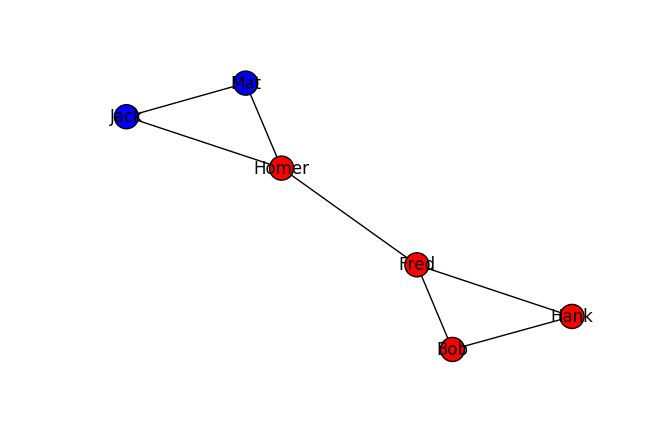

In [97]:
# lets plot the network
draw(Net)

We now have a graph that displays the structure of the network for six people
and the respective norms they hold.

Hank, Bob, Fred and Homer think people should wear suits while Mat and Jack think people should dress casually

### Granovetter Threshold Model

Lets say the norm evolves in the network according to a Granovettre threshold Model with t = 0.6, meaning
that people will adopt the norm that over 60% of their contacts are displaying. Once someone adopts a new norm, he doesn't switch back to the previous norm.

Can you guess what happens to Homer and Fred?

Lets build a procedure that generalizes this mechanism to the whole network
We need a function that updates the norm for a single node and then apply that functon to all nodes.

initializing empty dictionaries to keep track of updates

In [98]:
threshold = 0.6
#initializing empty dictionaries to keep track of updates
node_norm_update = {}
node_color_update = {}

loop over nodes and count the norms of the neighbors

In [99]:
# loop over nodes and count the norms of the neighbors
for n in Net.nodes():
    node_norm = Net.node[n]['norm']
    nbr_suits = 0
    nbr_casual = 0
        
    for nbr in Net.neighbors(n):
        nbr_norm = Net.node[nbr]['norm']
        if nbr_norm == 'suits':
            nbr_suits += 1
        if nbr_norm == 'casual':
            nbr_casual += 1
        

calculating fraction of neighbors for each norm

In [100]:
#calculating fraction of norms 
suit_frac = nbr_suits /(nbr_suits+nbr_casual)
casual_frac = nbr_casual /(nbr_suits+nbr_casual)

check if fraction of norms exceed the threshold

In [101]:
#check if fraction of norms exceed the threshold
if suit_frac >= threshold:
    if node_norm == 'casual':
        node_norm_update[n]='suits'
        node_color_update[n]='red'
                

if casual_frac >= threshold:
    if node_norm == 'suits': 
        node_norm_update[n]='casual'
        node_color_update[n]='blue'


update node's norm

In [102]:
# update node's norm         
for node in node_norm_update.keys():
    print('node to change',node)
    Net.node[node]['norm'] = node_norm_update[node]
    Net.node[node]['color'] = node_color_update[node]

Let's put all the above steps in a function that we can run multiple times for different networks'

In [103]:
def update_norm_granovetter_1_round(g , threshold):
    
    node_norm_update = {}
    node_color_update = {}

    for n in g.nodes():
        node_norm = g.node[n]['norm']
        nbr_suits = 0
        nbr_casual = 0
        
        for nbr in g.neighbors(n):
            nbr_norm = g.node[nbr]['norm']
            print(nbr_norm)
            if nbr_norm == 'suits':
                nbr_suits += 1
            if nbr_norm == 'casual':
                nbr_casual += 1
        
        suit_frac = nbr_suits /(nbr_suits+nbr_casual)
        casual_frac = nbr_casual /(nbr_suits+nbr_casual)

        if suit_frac >= threshold:
            if node_norm == 'casual':
                node_norm_update[n]='suits'
                node_color_update[n]='red'
                

        if casual_frac >= threshold:
            if node_norm == 'suits': 
                node_norm_update[n]='casual'
                node_color_update[n]='blue'

                
    for node in node_norm_update.keys():
        print('node to change',node)
        g.node[node]['norm'] = node_norm_update[node]
        g.node[node]['color'] = node_color_update[node]
        
        

    return g

Now we can update all nodes simultanously according to the Granovetter threshold Model

In [104]:
old_ntw = Net.copy()
updated_ntw = update_norm_granovetter_1_round(old_ntw , threshold = 0.6)

suits
casual
 ################ node Mat #########
1 0.5
suits
suits
 ################ node Bob #########
2 1.0
suits
suits
suits
 ################ node Fred #########
3 1.0
suits
suits
 ################ node Hank #########
2 1.0
casual
casual
suits
 ################ node Homer #########
1 0.3333333333333333
chnage to casual
casual
suits
 ################ node Jack #########
1 0.5
node to change Homer


In [105]:
updated_ntw.nodes(data = True)

NodeDataView({'Mat': {'norm': 'casual', 'color': 'blue'}, 'Bob': {'norm': 'suits', 'color': 'red'}, 'Fred': {'norm': 'suits', 'color': 'red'}, 'Hank': {'norm': 'suits', 'color': 'red'}, 'Homer': {'norm': 'casual', 'color': 'blue'}, 'Jack': {'norm': 'casual', 'color': 'blue'}})

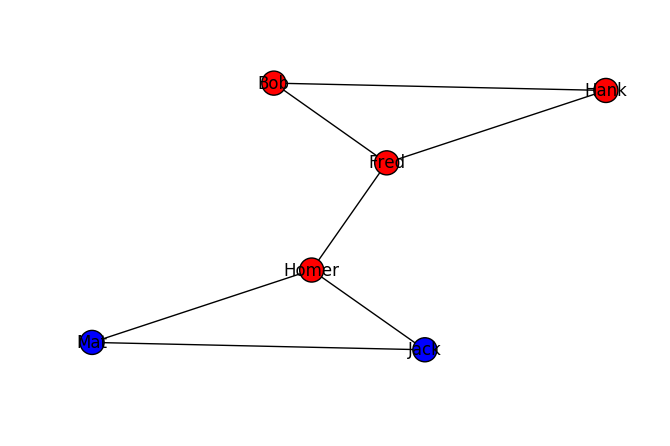

############## UPDATED NETWORK ##############


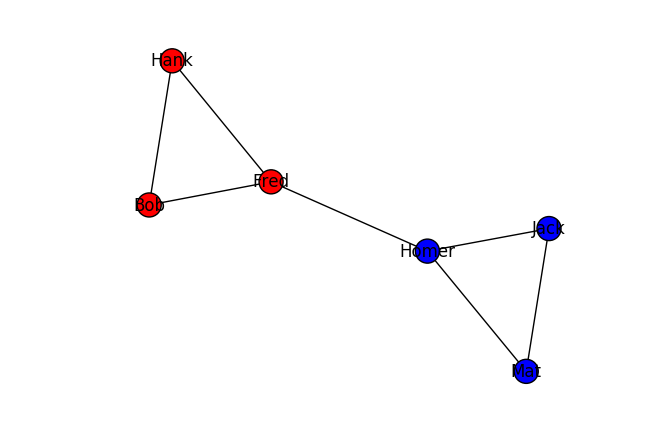

In [106]:
draw(Net)
print('############## UPDATED NETWORK ##############')
draw(updated_ntw)

Note: when using jupyter notebook, the network is updated on the fly. To work with the original network, always make a copy of Net and then give that to the function. 

lets vary the threshold.

### What happens if we let the network evovles based on this simple rule?

We now need a function that takes a network as input and then updates all nodes and returns the updated network. For simplicity, we assume once an agent changes her state, she doesn't return to her previous state. We all want to be fasion forwards!! 

In [107]:
def update_norm_granovetter_multi_round(g , threshold):
    
    nodes_already_changed = [] #we make a list of nodes that have already changed their norm
    for i in range(20):
        node_norm_update = {}
        node_color_update = {}
    
        for n in g.nodes():
            if n in nodes_already_changed: #to make the code efficient, we don't loop over nodes who have already changed
                continue
            node_norm = g.node[n]['norm']
            nbr_suits = 0
            nbr_casual = 0
        
            for nbr in g.neighbors(n):
                nbr_norm = g.node[nbr]['norm']
                if nbr_norm == 'suits':
                    nbr_suits += 1
                if nbr_norm == 'casual':
                    nbr_casual += 1
        
            suit_frac = nbr_suits /(nbr_suits+nbr_casual)
            casual_frac = nbr_casual /(nbr_suits+nbr_casual)

            if suit_frac >= threshold:
                if node_norm == 'casual': 
                    node_norm_update[n]='suits'
                    node_color_update[n]='red'                
                

            if casual_frac >= threshold:
                if node_norm == 'suits': 
                    node_norm_update[n]='casual'
                    node_color_update[n]='blue'
                
        for node in node_norm_update.keys():
            g.node[node]['norm'] = node_norm_update[node]
            g.node[node]['color'] = node_color_update[node]
            nodes_already_changed.append(node) #we add this node to the list

    return g

lets use the function to do multiple iteration of the Granovetter Threshold Model

In [108]:
old_ntw = Net.copy()
updated_ntw = update_norm_granovetter_multi_round(old_ntw , threshold = 0.6)

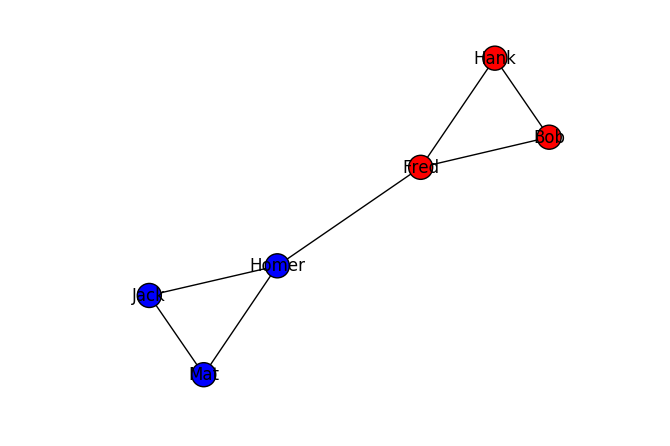

In [109]:
draw(updated_ntw)

### Impact of network structure on Granovetter threshold model

#### Zachary Karate Club

A social network of a karate club was studied by Wayne W. Zachary for a period of three years from 1970 to 1972.[2] The network captures 34 members of a karate club, documenting links between pairs of members who interacted outside the club. During the study a conflict arose between the administrator "John A" and instructor "Mr. Hi" (pseudonyms), which led to the split of the club into two. Half of the members formed a new club around Mr. Hi; members from the other part found a new instructor or gave up karate. Based on collected data Zachary correctly assigned all but one member of the club to the groups they actually joined after the split. (Wikipedia)

In [110]:
G = nx.karate_club_graph()

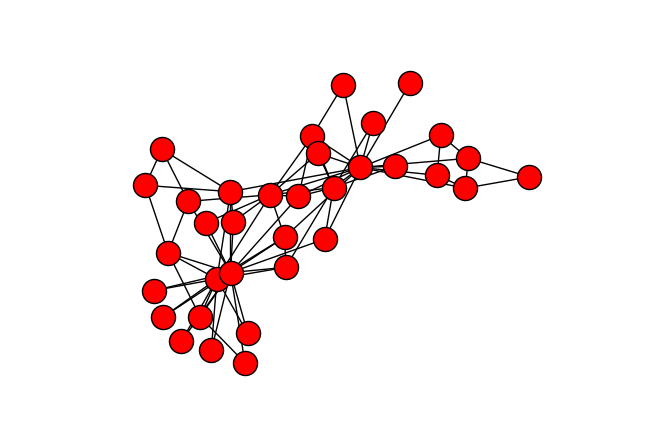

In [111]:
draw_karate = nx.draw(G, pos = nx.spring_layout(G))
plt.show()

In [112]:
print (G.nodes(data = True))

[(0, {'club': 'Mr. Hi'}), (1, {'club': 'Mr. Hi'}), (2, {'club': 'Mr. Hi'}), (3, {'club': 'Mr. Hi'}), (4, {'club': 'Mr. Hi'}), (5, {'club': 'Mr. Hi'}), (6, {'club': 'Mr. Hi'}), (7, {'club': 'Mr. Hi'}), (8, {'club': 'Mr. Hi'}), (9, {'club': 'Officer'}), (10, {'club': 'Mr. Hi'}), (11, {'club': 'Mr. Hi'}), (12, {'club': 'Mr. Hi'}), (13, {'club': 'Mr. Hi'}), (14, {'club': 'Officer'}), (15, {'club': 'Officer'}), (16, {'club': 'Mr. Hi'}), (17, {'club': 'Mr. Hi'}), (18, {'club': 'Officer'}), (19, {'club': 'Mr. Hi'}), (20, {'club': 'Officer'}), (21, {'club': 'Mr. Hi'}), (22, {'club': 'Officer'}), (23, {'club': 'Officer'}), (24, {'club': 'Officer'}), (25, {'club': 'Officer'}), (26, {'club': 'Officer'}), (27, {'club': 'Officer'}), (28, {'club': 'Officer'}), (29, {'club': 'Officer'}), (30, {'club': 'Officer'}), (31, {'club': 'Officer'}), (32, {'club': 'Officer'}), (33, {'club': 'Officer'})]


In [113]:
node_list =  G.nodes()
random.choice(node_list)

{'club': 'Officer'}

Lets apply the Threshold Model on the Zachari club.
First, let's assume all nodes are casual and 1 random person decides to wear suits. How many people will follow that person?

Frist, we need to modify the code by initializing 'norm' attribute and choosing a seed (1 random node).

In [114]:
def update_norm_granovetter_karate(g , threshold, seeds_nr):
    nodes_already_changed = [] #we make a list of nodes that have already changed their norm

    # initializing
    for n in g.nodes():
        g.node[n]['norm'] = 'casual'
        g.node[n]['color'] = 'blue'
    
    node_list = [v for v in g.nodes()]
    # choosing a random node and changing her norm
    for s in range(seeds_nr):
        rnd_node = random.choice(node_list)
        print('random node is',rnd_node)
        g.node[rnd_node]['norm'] = 'suits'
        g.node[rnd_node]['color'] ='red'
        nodes_already_changed.append(rnd_node)
        
    for i in range(20): #let's increase number of itterations to make sure we reach stability
        node_norm_update = {}
        node_color_update = {}
    
        for n in g.nodes():
            if n in nodes_already_changed: continue #we pass nodes who have already changes 
            node_norm = g.node[n]['norm']
            nbr_suits = 0
            nbr_casual = 0
        
            for nbr in g.neighbors(n):
                nbr_norm = g.node[nbr]['norm']
                if nbr_norm == 'suits':
                    nbr_suits += 1
                if nbr_norm == 'casual':
                    nbr_casual += 1
        
            suit_frac = nbr_suits /(nbr_suits+nbr_casual)
            casual_frac = nbr_casual /(nbr_suits+nbr_casual)

            if suit_frac >= threshold:
                if node_norm == 'casual': 
                    node_norm_update[n]='suits'
                    node_color_update[n]='red'                
                

            if casual_frac >= threshold:
                if node_norm == 'suits': 
                    node_norm_update[n]='casual'
                    node_color_update[n]='blue'
                
        for node in node_norm_update.keys():
            g.node[node]['norm'] = node_norm_update[node]
            g.node[node]['color'] = node_color_update[node]
            nodes_already_changed.append(node)

    return g

In [115]:
update_karate_ntw = G.copy()

In [116]:
update_karate_ntw = update_norm_granovetter_karate(update_karate_ntw , threshold = 0.6 , seeds_nr = 1)

random node is 9


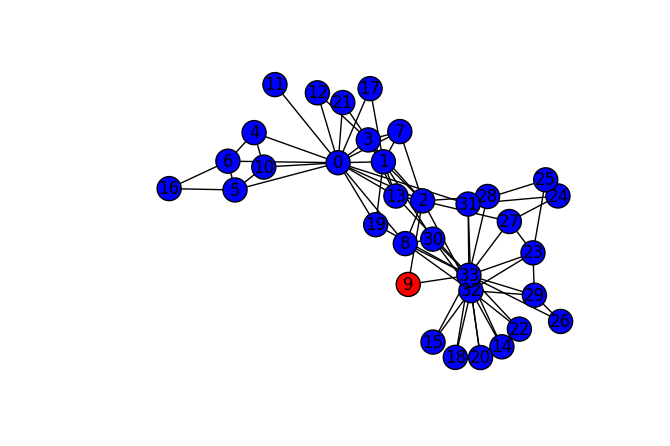

In [117]:
draw(update_karate_ntw)

Let's increase number of initial seeds

In [118]:
update_karate_ntw = G.copy()
update_karate_ntw = update_norm_granovetter_karate(update_karate_ntw , threshold = 0.6 , seeds_nr =5)

random node is 16
random node is 10
random node is 20
random node is 0
random node is 4


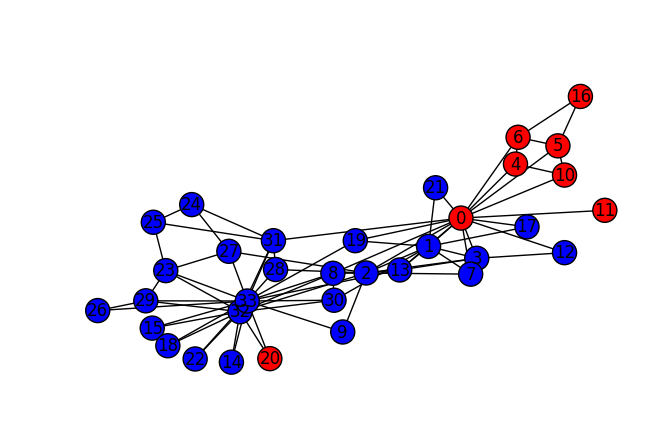

In [119]:
draw(update_karate_ntw)

let's changes the threshold